# STA130 Homework 05 - Jason Li

## A.

Video 1: https://www.youtube.com/watch?v=ZzeXCKd5a18

Null hypothesis $H_0$\
Alternative hypothesis $H_1$ or $H_A$

- Two sided: null hypothesis $value=x$, alternative hypothesis $value\neq x$
- One sided: null hypothesis $value\geq x$, alternative hypothesis $value<x$ (or vice versa)

## B.

Video 2: https://www.youtube.com/watch?v=9jW9G8MO4PQ

## 1.

### What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically?

For something to be a hypothesis of a statistical test, there must be data available to test. The example given in the video was: it cannot be determined whether a Trump or Clinton presidency would be better (define better), since there is not data for both.

###  What would you describe is the key "criteria" defining what a good null hypothesis is?

A good null hypothesis must be the status quo. It must be something that can't be rejected by default. To be rejected, it must have evidence brought up. Otherwise, it is not rejected.

It should also have a specific definition that is testable and comparable to an observed statistic. The example in the video was "apples in NYC are expensive" (one-sided test), expensive must be defined (eg. more than \\$1.75 per pound).

### What is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing?

A null hypothesis can be described as the *status quo*. It is presumed that you can't reject the null hypothesis. The alternative hypothesis is accepted if there is evidence for the null hypothesis to be rejected.

## 2.

Remember that a population parameter is a fixed value that is true for the entire population, whereas a sample statistic is only true for some sample, and the value can vary between different samples.

In a hypothesis test, we are using data from our sample to make an inference about the total population. This is different than just observing the statistic in the sample, since the statistic can vary each time you take a sample.

In a hypothesis test, we make an assumption for the population parameter, which we call the null hypothesis. To either reject or fail to reject the null hypothesis, we take our observed statistic from our sample (some statistic we want to observe, eg. sample mean). Now, relative to our assumption, we see how likely it was to observe that observed statistic, or something more extreme than that (area of the graph under the null hypothesis, that is equal or more extreme).

The outcome of tests refer to the population parameter, because we want to either reject or fail to reject the null hypothesis for the population. We want to come to some conclusion for *everyone*, not just the sample that we have.

We hypothesize a population parameter under the null hypothesis ($\mu_0$). We use our observed sample values $x_i$'s to calculate the observed statistic $\bar{x}$. We want to use the sample statistic $\bar{x}$ to infer conclusions about the population parameter $\mu$. Even though we only use the sample, we hypothesize, test, and draw conclusions on the population.

## 3.

The p-value tells us how likely it is that something will happen at least as extreme as our observed statistic if the null hypothesis is true. This is why we imagine a world where the null hypothesis is true when calculating a p-value.

## 4.

A smaller p-value makes the null hypothesis look more ridiculous because the p-value tells you how likely it is to (in a world where we assume the null hypothesis is true) get data at least as *weird*/extreme as the data calculated from the sample data. 

As the video states, a large p-value occurs when something happens that makes the null hypothesis probable, whereas a small p-value occurs when something happens that makes the null hypothesis still *possible*, but improbable. 

## 5.

In [1]:
import numpy as np

n_simulations = 10000
n_samples = 124
right_tilt_threshold = 80

# Keep track of how many simulations have at least 80 right tilts
n_simulations_above_threshold = 0

for i in range(n_simulations):
  # Simulate 124 coin flips (0 for left, 1 for right)
  simulated_tilts = np.random.choice([0, 1], size=n_samples, replace=True)

  # Count the number of right tilts in this simulation
  n_right_tilts = np.sum(simulated_tilts)

  # If the number of right tilts is 80 or more, increment the counter
  if n_right_tilts >= right_tilt_threshold:
    n_simulations_above_threshold += 1

# Calculate the p-value
p_value = n_simulations_above_threshold / n_simulations

print("p-value:", p_value)

p-value: 0.0011


The p-value is less than 0.001, so we have very strong evidence against the null hypothesis.

## 6.

No. The p-value can never "definitely" prove the null hypothesis false (or true). The p-value tells us the probability of something happening as or more extreme than our observed statistic, if the null hypothesis were true. We can use it as evidence to either reject or not reject the null hypothesis, but never prove it false or true.

In [2]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

In [3]:
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


In [4]:
import numpy as np

print(pd.DataFrame({'HealthScoreChange': patient_data['HealthScoreChange'],
                    '> 0 ?': patient_data['HealthScoreChange']>0}))

random_difference_sign = np.random.choice([-1, 1], size=len(patient_data))
pd.DataFrame({'HealthScoreChange': random_difference_sign*patient_data['HealthScoreChange'].abs(),
              '> 0 ?': (random_difference_sign*patient_data['HealthScoreChange'])>0})

   HealthScoreChange  > 0 ?
0                  2   True
1                  8   True
2                 -3  False
3                  5   True
4                  3   True
5                  6   True
6                  7   True
7                 -3  False
8                  7   True
9                  1   True


,HealthScoreChange,> 0 ?
0,2,True
1,-8,False
2,-3,True
3,5,True
4,3,True
5,6,True
6,-7,False
7,3,False
8,-7,False
9,1,True


In [5]:


np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect) is true 
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):
    
    # why is this equivalent to the suggested idea above?
    random_improvement = np.random.choice([0,1], size=len(patient_data), replace=True)  # <<< `replace=True` ^^^

    # why is .mean() a proportion? 
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()
    # why is this the statistic we're interested in? Hint: next section...



In [6]:
# "as or more extreme" relative to the hypothesized parameter of the statistic!
population_parameter_value_under_H0 = 0.5

observed_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

SimStats_as_or_more_extreme_than_ObsStat = \
    abs(simulated_statistics - population_parameter_value_under_H0) >= \
    abs(observed_statistic - population_parameter_value_under_H0) 
    
print('''Which simulated statistics are "as or more extreme"
than the observed statistic? (of ''', observed_statistic, ')', sep="")

pd.DataFrame({'(Simulated) Statistic': simulated_statistics,
              '>= '+str(observed_statistic)+" ?": ['>= '+str(observed_statistic)+" ?"]*number_of_simulations, 
              '"as or more extreme"?': SimStats_as_or_more_extreme_than_ObsStat})

Which simulated statistics are "as or more extreme"
than the observed statistic? (of 0.8)


,(Simulated) Statistic,>= 0.8 ?,"""as or more extreme""?"
0,0.7,>= 0.8 ?,False
1,0.4,>= 0.8 ?,False
2,0.3,>= 0.8 ?,False
3,0.5,>= 0.8 ?,False
4,0.8,>= 0.8 ?,True
...,...,...,...
9995,0.4,>= 0.8 ?,False
9996,0.1,>= 0.8 ?,True
9997,0.4,>= 0.8 ?,False
9998,0.6,>= 0.8 ?,False


In [7]:
# Calculate the p-value
# How many bootstrapped statistics generated under H0 
# are "as or more extreme" than the observed statistic 
# (relative to the hypothesized population parameter)? 

observed_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# The below code is the original from TUT05 Demo II. It is commented out for reference.

# Be careful with "as or more extreme" as it's symmetric!
#SimStats_as_or_more_extreme_than_ObsStat = \
#    abs(simulated_statistics - population_parameter_value_under_H0) >= \
#    abs(observed_statistic - population_parameter_value_under_H0)

# I will change this to check strictly >=, rather than using absolute value.
# This will change it to one tailed.

SimStats_as_or_more_extreme_than_ObsStat = \
    (simulated_statistics - population_parameter_value_under_H0) >= \
    (observed_statistic - population_parameter_value_under_H0)
    
p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 565

p-value
(= simulations "as or more extreme" / total simulations): 0.0565


In the previous cell, see the comments for where I changed this to be one-tailed instead of two-tailed.

Instead of using absolute value, it is checking strictly if the simulated stats are as or more extreme than the observed statistics. This is now checking if the health score change is positive ($>0$), rather than just if it changed ($\neq 0$).

This changes the p-value, because it is only one-tailed. We are only checking statistics as or more extreme on one side ($>0$), rather than on both sides.

## 8.

### Problem introduction

This problem is a hypothesis test to see whether people can identify if tea or milk was poured first in a cup of tea with milk.

49 out of a sample of 80 students correctly stated whether tea or milk was poured first.

Our sample is the 80 students.\
Our observed statistic ($\bar{x}$) will be the percentage of people in our sample who could correctly state what was poured first, $49/80=0.6125$.\
Our population parameter value under the null hypothesis ($\mu_0$) will be $0.5$, meaning it is a coin-flip (50/50 random chance) whether someone can correctly state what was poured first.

$H_0$: Most people cannot correctly identify whether tea or milk was poured first, or $\mu<=0.5$\
$H_A$: $H_0$ is false

This is a one-tailed test.

In the first code cell, I will initialize some variables. These are explained above.

In [8]:
import numpy as np

np.random.seed(1)

number_of_simulations = 10000
sample_size = 80

observed_statistic = 49/80 # 0.6125

# Create an array to store the results of each simulation
simulated_statistics = np.empty(number_of_simulations)

I will run 10000 simulations.

In each simulation, I want to generate a sample of 80. I want each sample value ($x_i$) to be a coin-flip (random chance) between 0 or 1, where 0 represents not correctly stating what was poured first, and 1 represents correctly stating it.

I will find the mean in each sample. Because the values are 0 and 1, the mean represents the percentage of people in this sample who correctly stated what was poured first. This is our sample statistic ($\bar{x}$).

I will store all of the sample statistics in the array I initialized earlier.

In [9]:
for i in range(number_of_simulations):
    # Generate a random sample with a 50/50 chance of 0 or 1
    sample = np.random.choice([0, 1], size=sample_size, replace=True)
    # Calculate the sample statistic (proportion of 1s)
    sample_statistic = np.mean(sample)
    # Store the sample statistic
    simulated_statistics[i] = sample_statistic

Let's add some visuals!

This code is generated by ChatGPT and is not relevant. It is just to display the graph.

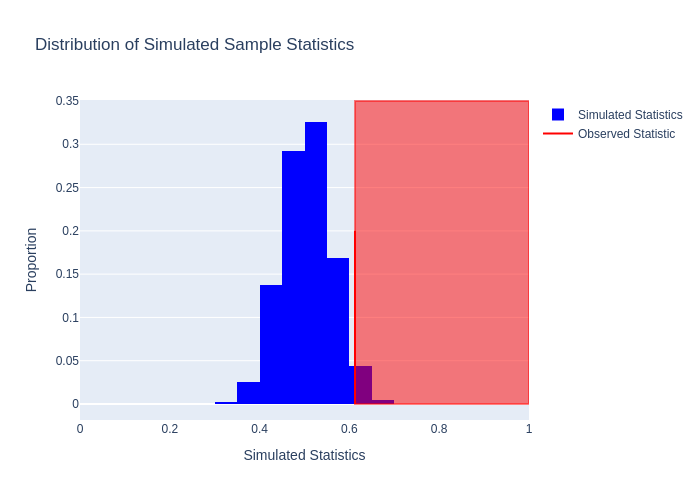

In [10]:
import plotly.express as px
import plotly.graph_objects as go

# Create a histogram of the simulated statistics
fig = go.Figure()

# Add histogram with normalized y-axis
fig.add_trace(go.Histogram(
    x=simulated_statistics,
    nbinsx=10,  # Number of bins
    marker_color='blue',
    opacity=1.0,
    name='Simulated Statistics',
    histnorm='probability'  # Normalize to show proportions
))

# Add a vertical line for the observed statistic
fig.add_trace(go.Scatter(
    x=[observed_statistic, observed_statistic],
    y=[0, 0.2],  # Adjust this to fit your y-axis scale (0 to 0.2 for proportion)
    mode='lines',
    line=dict(color='red', width=2),
    name='Observed Statistic'
))

# Add a highlighted area to the right of the observed statistic
fig.add_shape(
    type='rect',
    x0=observed_statistic,
    x1=1,  # Extend to the maximum of the x-axis
    y0=0,
    y1=0.35,  # Adjust this to fit your y-axis scale
    fillcolor='rgba(255, 0, 0, 0.5)',  # Semi-transparent red
    line=dict(color='rgba(255, 0, 0, 0.5)')  # Match the border color with the fill color
)

# Update layout
fig.update_layout(
    title='Distribution of Simulated Sample Statistics',
    xaxis_title='Simulated Statistics',  # Updated x-axis label
    yaxis_title='Proportion',  # Y-axis label updated to Proportion
    xaxis=dict(range=[0, 1]),  # Set x-axis range from 0 to 1
    showlegend=True
)

# Show the figure
fig.show(renderer="png")


Now, I have 10000 sample statistics, one from each simulation.

I will count the number of times the simulated sample statistic is greater than or equal to the observed statistic.\
I am comparing my simulated statistics against my observed statistic.

In other words: in the world where the null hypothesis is true (because it was a coin-flip between 0 and 1, explained above), I will find the likelihood of something as or more extreme happening than our observed statistic.

This is the p-value!

In [11]:
# Count the number of times the simulated sample statistic is greater than or equal to the population parameter
count_greater_than_or_equal = np.sum(simulated_statistics >= observed_statistic)

# Calculate the proportion of times the simulated sample statistic is greater than or equal to the population parameter
p_value = count_greater_than_or_equal / number_of_simulations

# Print the p-value
print("p-value:", p_value)

p-value: 0.0284


Our p value is less than 0.05. This means we can reject the null hypothesis. There is evidence in the data to support that people *can* correctly state the order that milk and tea is poured.

## ChatBot summaries

I used NotebookLM rather than ChatGPT for the homework (as suggested by the professor), so no transcripts are available, only summaries.

---

### Summary 1

You asked for a summary of your exchanges regarding the calculation and meaning of the test statistic in hypothesis testing, and how it relates to the p-value and the null hypothesis.

You began by seeking clarification about the specific value that is calculated as the test statistic. The response clarified that you **never calculate the population mean (μ) directly** in hypothesis testing. Instead, you use your knowledge of distributions and simulation to *estimate* it.

The response then provided examples of test statistics used in different hypothesis testing scenarios:

*   **Sample mean ( $\bar{x}$ )**: Used to test hypotheses about a single population mean. [Our Conversation]
*   **Difference between two sample means ( $\bar{x}_1$ - $\bar{x}_2$ )**: Used for hypotheses about the difference between two population means. [Our Conversation]
*   **Sample proportion (  $\hat{p}$ )**:  Used for hypotheses about a population proportion.  [Our Conversation]

You then sought further clarification, asking: "So the test statistic is the sample mean?" The response corrected this misunderstanding, emphasizing that the test statistic is not *always* the sample mean, but rather a value calculated from sample data that is used to evaluate a hypothesis about a population parameter.  [Our Conversation] The response reiterated that the **choice of test statistic depends on the research question and data type**, and provided examples to illustrate this point.&#x20;

You then shifted the conversation to ask, "Okay understood. Now how does this relate to the question?" You were referring to Question 4 from a homework assignment, which asked about the relationship between the p-value and the null hypothesis. The response explained that **a smaller p-value makes the null hypothesis look "more ridiculous"** because it signifies that the observed data (represented by the test statistic) are unusual or extreme relative to the sampling distribution under the null hypothesis.  [109, 113, Our conversation]

The response provided a detailed explanation of why a smaller p-value casts more doubt on the null hypothesis, highlighting these points:

*   The **sampling distribution of the test statistic under the null hypothesis** represents the range of likely test statistic values we'd expect if the null hypothesis were true.
*   **Extreme test statistic values** (falling in the tails of the sampling distribution) are unlikely to occur if the null hypothesis were true.
*   **The p-value measures how unusual the observed test statistic value is**, assuming the null is true. A **smaller p-value** means the observed test statistic is further out in the tails of the distribution, indicating it is **highly unlikely to have occurred by random chance alone if the null hypothesis were true**. [122, Our Conversation]
*   Therefore, **a small p-value challenges the plausibility of the null hypothesis**, making it appear increasingly unlikely.

The response concluded with an analogy to further clarify the concept.

---

### Summary 2

The conversation begins with a question about a statement from the "first pre-lecture video": "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population." The user seeks clarification on this statement, specifically in the context of the terms $x_i$'s, $\bar{x}$, $\mu$, and $\mu_0$. 

The user provides an initial answer that explains the difference between population parameters and sample statistics using the example of average student height. The answer accurately defines the key terms and emphasizes that hypothesis tests aim to draw conclusions about the population based on sample data. The response highlights the importance of distinguishing between sample values, sample statistics, and population parameters.

The response then provides feedback on the user's answer, praising its clarity and relatable example. It suggests three enhancements:

1.  **Connecting to Sampling Distributions:** The response suggests explicitly mentioning sampling distributions. It explains that a sampling distribution is the theoretical distribution of a statistic (e.g., the sample mean) obtained from many samples from the population. Hypothesis testing compares the observed statistic to this distribution to determine its likelihood under the null hypothesis.
2.  **Mentioning the Role of Variability:** The response suggests expanding on the idea of variability, noting that sample statistics vary between samples, a fact captured by the standard error. The smaller the standard error, the more precise the population parameter estimate. This variability means the hypothesis test outcome is an educated guess.
3.  **Relating to Hypothesis Testing Steps:** The response suggests briefly outlining how the distinction between sample statistics and population parameters operates in hypothesis testing steps. It recommends mentioning that a hypothesis test compares the observed sample mean ($\bar{x}$) to the hypothesized population mean ($\mu_0$).  The likelihood of observing the sample mean or a more extreme value under the null hypothesis guides the decision of whether to reject or fail to reject the null hypothesis.

The response concludes by encouraging the incorporation of these suggestions to provide a comprehensive answer aligned with source concepts and enhances the understanding of statistical inference in hypothesis testing. 

---

### Summary 3

This conversation focused on using Python to simulate the results of a study on head-tilting in kissing couples.  The study, Güntürkün (2003) found that 80 out of 124 couples, or 64.5%, tilted their heads to the right while kissing.

The goal was to determine the probability of observing 80 or more right tilts out of 124 couples if there was no inherent preference for tilting one's head to the left or right in the population. This is known as a **null hypothesis** ($H_0$). In simpler terms, the null hypothesis is a statement assuming there's no real effect or difference.

You requested Python code to simulate this scenario using a "50/50 coin-flipping" model to represent the null hypothesis. In this model, each coin flip represents the head tilt direction (left or right) of a couple, with a 50% chance for either direction. 

The code was designed to perform 10,000 **simulations** (or experiments), each with 124 **samples**, representing 124 couples.  For each simulation, the code would determine if the number of couples who tilted their heads to the right was greater than or equal to 80. 

The output of the code would be a **p-value**, which represents the probability of observing the results obtained in the Güntürkün (2003) study if the null hypothesis were actually true. You could then refer to a provided table to determine the level of evidence against the null hypothesis based on the calculated p-value.  

For example, a p-value less than 0.001 represents "very strong" evidence against the null hypothesis. This means that if there was no true preference for head tilting direction while kissing, it would be very unlikely to observe 80 or more right tilts out of 124 couples.

This simulation aimed to help you understand **hypothesis testing**, a core concept in statistics that involves testing an idea that can be tested, where the **null hypothesis** represents a statement of "no effect," and the p-value helps us decide whether to reject this null hypothesis based on the evidence provided by the data.

---

### Summary 4

Our conversation focused on understanding how to modify a hypothesis test from two-tailed to one-tailed and the impact of this change on the p-value. 

Initially, you asked for help making a hypothesis test one-tailed. In response, I provided guidance on modifying the code by removing the absolute value function in the line defining  `SimStats_as_or_more_extreme_than_ObsStat`. I explained that this change would focus the test on extremity in a specific direction, either significantly higher or significantly lower than the hypothesized parameter value.

You then questioned whether the variable name should be changed for clarity and I offered several suggestions for more concise names, emphasizing that the chosen name should be readable and understandable. 

To further your understanding, you asked why the code modification made the test one-tailed. I explained that removing the absolute value function caused the code to focus solely on simulated statistics that were greater than the observed statistic, effectively focusing on a single tail of the distribution.

To move away from statistical jargon, you asked for an explanation of the test in the context of health score data. I clarified that the modified code specifically checked if the proportion of patients with improved health scores was greater than 50%, indicating an increase in health scores rather than just any change. 

Finally, you asked why this change affected the p-value. I explained that changing from a two-tailed to a one-tailed test alters the definition and measurement of "extreme" results. A one-tailed test focuses on extreme values in only one direction, making it more sensitive to detecting a difference in that specific direction, which typically results in a smaller p-value.

Our conversation effectively highlighted the key differences between one-tailed and two-tailed tests, the code modifications needed to switch between them, and the implications of these changes for interpreting results and p-values. 

---

### Summary 5

Our conversation explored why simulated statistics in a hypothesis test are compared against the **observed statistic** from the experiment, rather than the population parameter under the null hypothesis.  The discussion centered on a tea-tasting experiment with 80 students, where 49 correctly guessed the order of pouring milk and tea.

Initially, there was some confusion regarding the statement of the null and alternative hypotheses. It was important to emphasize that the null hypothesis typically asserts **no effect or no difference**, representing the default or "uninteresting" scenario. The null hypothesis is phrased in terms of the population parameter.

The conversation then clarified the need to compare the simulated results to the **observed statistic**, explaining that:

*   The p-value aims to quantify the evidence **against** the null hypothesis. It achieves this by assessing the probability of observing a result as extreme as, or more extreme than, the observed result if the null hypothesis were true.
*   The simulation generates data based on the assumption that the null hypothesis is true. This allows for a direct comparison between the simulated results (which represent the null hypothesis scenario) and the actual observation from the experiment.
*   The true population parameter is unknown.  The observed statistic from the sample is used to make inferences about this unknown parameter. The p-value helps to evaluate how unusual the observed statistic would be if the null hypothesis were true.

The conversation concluded by emphasizing that the p-value offers insight into how surprising the observed data is if the null hypothesis is true. A small p-value suggests that the observed result is quite unlikely under the assumption of the null hypothesis, providing evidence against it.  A large p-value, on the other hand, suggests that the observed result is not unusual under the null hypothesis, indicating a lack of strong evidence to reject it.

---

### Summary 6

1. **Simulation Setup**: You shared a Python code snippet to conduct a hypothesis test by simulating sample statistics using NumPy, generating binary outcomes to calculate sample proportions.

2. **Graph Request**: You requested a Plotly graph to visualize the distribution of the simulated statistics. I provided a histogram with a vertical line representing the observed statistic.

3. **Modifications**: You asked for adjustments to the graph, including normalizing the y-axis to show proportions, updating the x-axis label to "Simulated Statistics," and adding a highlighted area to indicate the rejection region for the hypothesis test.

4. **Final Adjustments**: I included the requested changes, ensuring the x-axis ranged from 0 to 1 and clearly displaying the relevant areas for your hypothesis testing.

---
